### Project 1 


In [46]:
import sqlite3 as sq
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib
import seaborn as sbn
import datetime as dt

In [47]:
conn = sq.connect('financial.db')
c = conn.cursor()
for row in  c.execute('SELECT  * FROM account limit 10'):
    print(row)
    


(1, 18, 'POPLATEK MESICNE', '1995-03-24')
(2, 1, 'POPLATEK MESICNE', '1993-02-26')
(3, 5, 'POPLATEK MESICNE', '1997-07-07')
(4, 12, 'POPLATEK MESICNE', '1996-02-21')
(5, 15, 'POPLATEK MESICNE', '1997-05-30')
(6, 51, 'POPLATEK MESICNE', '1994-09-27')
(7, 60, 'POPLATEK MESICNE', '1996-11-24')
(8, 57, 'POPLATEK MESICNE', '1995-09-21')
(9, 70, 'POPLATEK MESICNE', '1993-01-27')
(10, 54, 'POPLATEK MESICNE', '1996-08-28')


## Reading all tables using pandas
### Data description
#### account: 4500 rows in table. Each record describes characteristics of an account
#### client: 5369 rows in table. Each record describes characterics of a client
#### disp: 5369 rows in table. Each record relates together a client with an account
#### order: 6471 rows in table. Each record describes characteristics of a payment order.
#### trans: 1056320 rows in table. It stands for transactions. Each record describes one transaction on an account
#### loan: 682 rows in table. Each record describes a loan granted for a given account.
#### credit_card: 892 rows in table. Each record describes a credit card issued to an account.
#### demographic: 77 rows in table. Each record describes demographic characteristics of a district.

##### source for the information : https://sorry.vse.cz/~berka/challenge/pkdd1999/berka.htm


In [48]:
#here reading all the tables using pandas

account = pd.read_sql_query("SELECT  * FROM account",conn)
client = pd.read_sql_query("SELECT  * FROM client",conn)
disp = pd.read_sql_query("SELECT  * FROM disp",conn)
order = pd.read_sql_query("SELECT  * FROM 'order'",conn)
trans = pd.read_sql_query("SELECT  * FROM trans",conn)
loan = pd.read_sql_query("SELECT  * FROM loan",conn)
credit_card = pd.read_sql_query("SELECT  * FROM card",conn)
demographic = pd.read_sql_query("SELECT  * FROM district",conn)


In [49]:
print(account.head())
print(demographic.head())

   account_id  district_id         frequency        date
0           1           18  POPLATEK MESICNE  1995-03-24
1           2            1  POPLATEK MESICNE  1993-02-26
2           3            5  POPLATEK MESICNE  1997-07-07
3           4           12  POPLATEK MESICNE  1996-02-21
4           5           15  POPLATEK MESICNE  1997-05-30
   district_id           A2               A3       A4  A5  A6  A7  A8  A9  \
0            1  Hl.m. Praha           Prague  1204953   0   0   0   1   1   
1            2      Benesov  central Bohemia    88884  80  26   6   2   5   
2            3       Beroun  central Bohemia    75232  55  26   4   1   5   
3            4       Kladno  central Bohemia   149893  63  29   6   2   6   
4            5        Kolin  central Bohemia    95616  65  30   4   1   6   

     A10    A11  A12   A13  A14      A15    A16  
0  100.0  12541  0.2  0.43  167  85677.0  99107  
1   46.7   8507  1.6  1.85  132   2159.0   2674  
2   41.7   8980  1.9  2.21  111   2824.0   28

#### Exploring all tables one by one and then merge them all later on.
#### Lets start with account table. 

In [50]:
# checking if one claient have more than one account
for row in  c.execute('SELECT  count(*) FROM disp as d inner join client as c on c.client_id = d.client_id '):
    print(row) # total resulted records are 5369. that means all records from client table are matching with disp table. that means we can merge disp and account table to find out one client has how many accounts.
    
ac_cli_join = pd.read_sql_query("SELECT a.account_id, c.district_id, count(*) from client as c inner join account as a on c.district_id=a.district_id group by c.district_id, a.account_id having count(*)>1",conn)
print(ac_cli_join.head())

# lets grab the year from date column in account table
account['account_created_year'] = [d.split('-')[0] for d in account.date]

account = account.drop(['date'], axis=1)
print(account.head())

(5369,)
   account_id  district_id  count(*)
0           1           18        60
1           2            1       663
2           3            5        71
3           4           12        44
4           5           15        63
   account_id  district_id         frequency account_created_year
0           1           18  POPLATEK MESICNE                 1995
1           2            1  POPLATEK MESICNE                 1993
2           3            5  POPLATEK MESICNE                 1997
3           4           12  POPLATEK MESICNE                 1996
4           5           15  POPLATEK MESICNE                 1997


   order_id  account_id bank_to  account_to  amount k_symbol  account_id  \
0     29401           1      YZ    87144583  2452.0     SIPO           1   
1     29402           2      ST    89597016  3372.7     UVER           2   
2     29403           2      QR    13943797  7266.0     SIPO           2   
3     29404           3      WX    83084338  1135.0     SIPO           3   
4     29405           3      CD    24485939   327.0                    3   

   district_id         frequency        date  
0           18  POPLATEK MESICNE  1995-03-24  
1            1  POPLATEK MESICNE  1993-02-26  
2            1  POPLATEK MESICNE  1993-02-26  
3            5  POPLATEK MESICNE  1997-07-07  
4            5  POPLATEK MESICNE  1997-07-07  


Text(0.5, 1.0, 'frequency of Statement issuence')

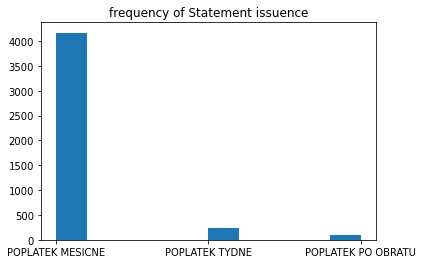

In [51]:
#account and order table join to see relatonship between both of them
ac_ord_join = pd.read_sql_query("SELECT * from 'order' as o inner join account as a on o.account_id=a.account_id",conn)
print(ac_ord_join.head())

plt.hist(account['frequency'],10)
plt.title('frequency of Statement issuence')



#### Here is important visual from account table. According to above visual, it seems like frequecny of monthly issuance statement is way higher than weekly and after transaction issuence for each account. Here POPLATEK MESICNE, POPLATEK TYDNE and POPLATEK PO OBRATU stands for monthly, weekly and current transactions.

### Client table
#### exploring gender catagory

Text(0.5, 1.0, 'gender')

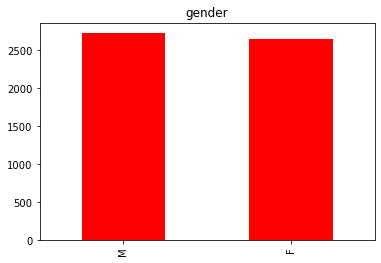

In [52]:
client['gender'].value_counts().plot(kind='bar',color='red', subplots = True)
plt.title('gender')

#### Here is important visual from client table. According to this bar chart it seems like we have almost equal amount of male and female customers.

In [53]:
import numpy as np

In [54]:
# grab the year from birth date and calculate client age. Suppose we assume current year as 1999
client['client_birth_year'] = [d.split('-')[0] for d in client.birth_date]

client = client.drop(['birth_date'], axis=1)
cl = np.array(client['client_birth_year'])
#year_int = int(cl)

year_int = cl.astype(np.int)

client['age'] = 1999 - year_int
#print(year_int)

client['age_grp'] = client['age'] // 10 * 10

print(client.head())

   client_id gender  district_id client_birth_year  age  age_grp
0          1      F           18              1970   29       20
1          2      M            1              1945   54       50
2          3      F            1              1940   59       50
3          4      M            5              1956   43       40
4          5      F            5              1960   39       30


### Demographic table
#### The important thing is here to explore about total no. of inhabitants, no. of muncipalities with inhabitants, no. of cities, Avg salaries, unemployment rates during perticular year, no. of enterpreneurs, no. of commited crimes withing year 1995 to 1996. We can explore these all perameters to see their maximum, minimum and mean.

In [56]:
district = demographic.describe()
print(district)

       district_id            A4          A5         A6         A7         A8  \
count    77.000000  7.700000e+01   77.000000  77.000000  77.000000  77.000000   
mean     39.000000  1.338849e+05   48.623377  24.324675   6.272727   1.727273   
std      22.371857  1.369135e+05   32.741829  12.780991   4.015222   1.008338   
min       1.000000  4.282100e+04    0.000000   0.000000   0.000000   0.000000   
25%      20.000000  8.585200e+04   22.000000  16.000000   4.000000   1.000000   
50%      39.000000  1.088710e+05   49.000000  25.000000   6.000000   2.000000   
75%      58.000000  1.390120e+05   71.000000  32.000000   8.000000   2.000000   
max      77.000000  1.204953e+06  151.000000  70.000000  20.000000   5.000000   

              A9         A10           A11        A12        A13         A14  \
count  77.000000   77.000000     77.000000  76.000000  77.000000   77.000000   
mean    6.259740   63.035065   9031.675325   3.072368   3.787013  116.129870   
std     2.435497   16.221727  

### Order table
#### Lets explore order table to see in which account maximum times amount debited and get rid of unneccesary columns



   amount  account_id  count(*)
0  4422.1          96         5
1  1436.0          97         5
2  6256.0         173         5
3  4777.0         311         5
4  1766.0         365         5


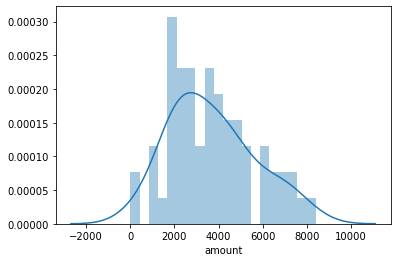

In [57]:
#main puprpose of this to see in which account maximum number of times amount debited. here maximum 5 times.
order_exp = pd.read_sql_query("SELECT amount, account_id, count(*) from 'order' group by account_id having count(*)>4",conn)
print(order_exp.head())

#plot this to see distribution of amount

sbn.distplot(order_exp['amount'], bins=20)

In [58]:
# transform order table to see important informations only and will get rid of unneccesary columns as well
order.count()

#order['account_to'].nunique()
#ppp = order.loc[:, ~order.columns.str.contains('^')]

order = order.pivot_table(index=['account_id'], columns = 'k_symbol', values='amount', fill_value = 0)
order.columns.name = None
order = order.reset_index()
print(order)

      account_id         LEASING  POJISTNE     SIPO    UVER
0              1    0.0      0.0         0   2452.0     0.0
1              2    0.0      0.0         0   7266.0  3372.7
2              3  327.0      0.0      3539   1135.0     0.0
3              4    0.0      0.0         0   1681.5     0.0
4              5    0.0      0.0         0   2668.0     0.0
...          ...    ...      ...       ...      ...     ...
3753       11328    0.0      0.0         0      0.0  4674.0
3754       11333    0.0   3286.7         0      0.0     0.0
3755       11349    0.0      0.0         0  10886.0  6998.0
3756       11359  254.0      0.0         0   4518.0  4502.3
3757       11362   92.5      0.0       330   4780.0  5392.0

[3758 rows x 6 columns]


#### Here is final transformed order table. Where I kept the information about payment characteristics along with amount and account id. So that we can have all payment information for perticular account. Also, column name POJISTNE stands for 'insurrance payment', SIPO stands for 'household', LEASING stands for 'leasing' and UVER stands for 'loan payment'

### Transaction(trans) table
#### we need to transform this table in order to get rid of unncessary columns and data

In [59]:
#drop unwanted columns
trans = trans.drop(['account'], axis=1)
trans = trans.drop(['bank'], axis=1)
#trans['type'].nunique()

#change the column name type's values in more understandable name
trans_query = pd.read_sql_query("SELECT distinct(type) from trans",conn)
#print(trans_query)
trans['type'] = trans['type'].replace(['PRIJEM','VYDAJ','VYBER'],['Credit', 'Withdrawal','Debit'])

#check the all unique values names
trans_opr = pd.read_sql_query("SELECT distinct(operation) from trans",conn)

#change the values of operation column
trans['operation'] = trans['operation'].replace(['VYBER KARTOU','VKLAD','PREVOD Z UCTU','VYBER','PREVOD NA UCET','None'],['Credit card withdrawal', 'Credit in cash','Collection from another bank','Withdrawal in cash','Remittance to another bank','Other'])

trans = trans.drop(['k_symbol'], axis=1)

#replace all None values to other
trans = trans.replace(['None'], 'Other')

#now pivot the table using type column to use values for later visualization
trans = trans.pivot_table(index=['account_id','date','operation','balance'],columns='type',values='amount',fill_value=0)
trans.columns.name = None
trans = trans.reset_index
#trans1 = trans.copy()

#pivot table using column operation
#trans = trans.pivot_table(index=['account_id','date','balance','Credit','Debit'],columns='operation',values='amount',fill_value=0)
#trans.columns.name = None
#trans = trans.reset_index
print(trans)


<bound method DataFrame.reset_index of                                                             Credit  Debit  \
account_id date       operation                    balance                  
1          1995-03-24 Credit in cash               1000       1000      0   
           1995-04-13 Collection from another bank 4679       3679      0   
           1995-04-23 Credit in cash               17279     12600      0   
           1995-05-13 Collection from another bank 20977      3679      0   
           1995-05-23 Credit in cash               23077      2100      0   
...                                                            ...    ...   
11382      1998-11-10 Collection from another bank 66310     30832      0   
           1998-11-30 Withdrawal in cash           66714         0      0   
           1998-12-02 Withdrawal in cash           41114         0      0   
           1998-12-10 Collection from another bank 87362     46248      0   
           1998-12-25 Withdrawal in c

#### now find out avg and median so that we can see balance per month and total savings per month

In [60]:
t_balance = trans(['account_id', 'date','balance'])
#print(t_balance)

#Lets split the year from date and get rid of date column
t_balance['Year'] = [d.split('-')[0] for d in t_balance.date]
#print(t_balance)

t_balance = t_balance.drop(['date'], axis=1)

In [61]:
#final table for checking balance
t_balance = t_balance.groupby('account_id', as_index=False).agg({'balance': ['mean','median']})
t_balance.columns = ['account_id', 'avg_monthly_balance', 'median_monthly_balance']
print(t_balance)

      account_id  avg_monthly_balance  median_monthly_balance
0              1         15794.969072                 15429.0
1              2         36552.975490                 36109.5
2              3         26633.686869                 24709.0
3              4         21678.570513                 21512.0
4              5         24812.869565                 26057.0
...          ...                  ...                     ...
4495       11333         46720.183206                 46209.0
4496       11349         50609.429119                 48491.0
4497       11359         35665.201835                 31537.0
4498       11362         31265.192810                 30109.0
4499       11382         36743.296512                 33220.0

[4500 rows x 3 columns]


In [62]:
t_amount = trans()
t_amount = t_amount.drop(['balance'], axis=1)

#Lets split the year from date and get rid of date column
t_amount['Year'] = [d.split('-')[0] for d in t_amount.date]
#print(t_amount)

t_amount = t_amount.drop(['date'], axis=1)

t_amount = t_amount.sort_values(['account_id', 'Year'], ascending=[True, True])


In [63]:
t_amount = t_amount.groupby(['account_id', 'Year']).sum().reset_index()
t_amount = t_amount.drop(['Year'], axis=1)
t_amount = t_amount.groupby(['account_id']).mean().reset_index()
print(t_amount)

      account_id         Credit         Debit     Withdrawal
0              1   47813.750000      0.000000   45217.500000
1              2  264389.333333  36240.333333  222836.166667
2              3   85494.500000      0.000000   60984.000000
3              4   63200.666667      0.000000   52879.000000
4              5   47961.500000      0.000000   34701.000000
...          ...            ...           ...            ...
4495       11333  332039.000000  80212.600000  243537.700000
4496       11349  497059.000000  57344.750000  433079.500000
4497       11359  300655.400000   5905.800000  281385.200000
4498       11362  170013.750000      0.000000  161438.250000
4499       11382  335348.000000  53103.000000  264584.750000

[4500 rows x 4 columns]


In [64]:
#merge avg balance and amount tables and form only one transaction table
trans = pd.merge(t_amount, t_balance, on=['account_id']) 
print(trans)

      account_id         Credit         Debit     Withdrawal  \
0              1   47813.750000      0.000000   45217.500000   
1              2  264389.333333  36240.333333  222836.166667   
2              3   85494.500000      0.000000   60984.000000   
3              4   63200.666667      0.000000   52879.000000   
4              5   47961.500000      0.000000   34701.000000   
...          ...            ...           ...            ...   
4495       11333  332039.000000  80212.600000  243537.700000   
4496       11349  497059.000000  57344.750000  433079.500000   
4497       11359  300655.400000   5905.800000  281385.200000   
4498       11362  170013.750000      0.000000  161438.250000   
4499       11382  335348.000000  53103.000000  264584.750000   

      avg_monthly_balance  median_monthly_balance  
0            15794.969072                 15429.0  
1            36552.975490                 36109.5  
2            26633.686869                 24709.0  
3            21678.5705

### Loan table
#### transform loan table to see useful informations only. The status values needs to be change.

In [85]:
#print(loan)

#change status column values in meaningful words

loan['status'] = loan['status'].replace(['A','B','C','D'],['contract finish without problems', 'contract finished and loan not paid','running contract OK so far','running contract and client in debt'])
loan['year_granted_loan'] = [d.split('-')[0] for d in loan.date]
loan = loan.drop(['date'], axis=1)

print(loan)

     loan_id  account_id  amount  duration  payments  \
0       4959           2   80952        24      3373   
1       4961          19   30276        12      2523   
2       4962          25   30276        12      2523   
3       4967          37  318480        60      5308   
4       4968          38  110736        48      2307   
..       ...         ...     ...       ...       ...   
677     7294       11327   39168        24      1632   
678     7295       11328  280440        60      4674   
679     7304       11349  419880        60      6998   
680     7305       11359   54024        12      4502   
681     7308       11362  129408        24      5392   

                                  status year_granted_loan  
0       contract finish without problems              1994  
1    contract finished and loan not paid              1996  
2       contract finish without problems              1997  
3    running contract and client in debt              1998  
4             running 

### Credit card data
#### Change the Issue date column only in year format. Meaning, grab year from issued column. Later drop the issued column.

     card_id  disp_id     type card_issued_year
0          1        9     gold             1998
1          2       19  classic             1998
2          3       41     gold             1995
3          4       42  classic             1998
4          5       51   junior             1995
..       ...      ...      ...              ...
887     1230    13312  classic             1998
888     1233    13382  classic             1996
889     1234    13386  classic             1997
890     1239    13442   junior             1998
891     1247    13660  classic             1995

[892 rows x 4 columns]


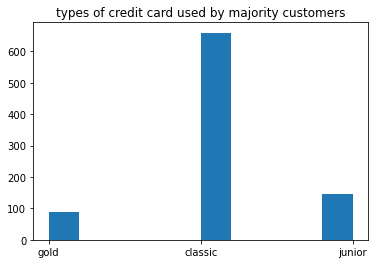

In [66]:

credit_card['card_issued_year'] = [d.split('-')[0] for d in credit_card.issued]

#print(credit_card)

credit_card = credit_card.drop(['issued'], axis=1)

#Lets visualize the type of cards and see what kind of cards people have. We can have basic idea from card type to predict whether it is good customer or bas customer
plt.hist(credit_card['type'],10)
plt.title('types of credit card used by majority customers')

print(credit_card)

#### It seems like majority customers has classic type that means this bank has majority of customers having average incomes. Later we will visualize more about which customers using gold, classic and junior cards.

### Now let's join all tables together and find some insights

In [86]:
#we will be joining tables based on their unique keys so that we can not have duplicate records and will use left join grab matching data from one table and grab all data from another table
join_client_disp = pd.merge(client, disp, on='client_id', how='left')
#print(join_client_disp.head())
join_client_demographic = pd.merge(join_client_disp, demographic, on='district_id', how='left')
#print(join_client_demographic.head())
join_client_card = pd.merge(join_client_demographic, credit_card, on='disp_id', how='left')
#print(join_client_card.shape)
join_trans_account = pd.merge(account, trans, on='account_id', how='left')
#print(join_trans_account.head())
join_loan_account = pd.merge(join_trans_account, loan, on='account_id', how='left')
#print(join_loan_account.head())
join_account_order = pd.merge(join_loan_account, order, on='account_id', how='left')
#print(join_account_order.head())
master_table = pd.merge(join_client_card, join_account_order, on='account_id', how='left')
print(master_table.head())

   client_id gender  district_id_x client_birth_year  age  age_grp  disp_id  \
0          1      F             18              1970   29       20        1   
1          2      M              1              1945   54       50        2   
2          3      F              1              1940   59       50        3   
3          4      M              5              1956   43       40        4   
4          5      F              5              1960   39       30        5   

   account_id     type_x           A2  ...   amount  duration  payments  \
0           1      OWNER        Pisek  ...      NaN       NaN       NaN   
1           2      OWNER  Hl.m. Praha  ...  80952.0      24.0    3373.0   
2           2  DISPONENT  Hl.m. Praha  ...  80952.0      24.0    3373.0   
3           3      OWNER        Kolin  ...      NaN       NaN       NaN   
4           3  DISPONENT        Kolin  ...      NaN       NaN       NaN   

                             status  year_granted_loan         LEASING  \


In [87]:
#transform some columns names
master_table = master_table.rename(columns = {'type_y': 'card_type'}, inplace = False)
print(master_table.columns)

Index(['client_id', 'gender', 'district_id_x', 'client_birth_year', 'age',
       'age_grp', 'disp_id', 'account_id', 'type_x', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16',
       'card_id', 'card_type', 'card_issued_year', 'district_id_y',
       'frequency', 'account_created_year', 'Credit', 'Debit', 'Withdrawal',
       'avg_monthly_balance', 'median_monthly_balance', 'loan_id', 'amount',
       'duration', 'payments', 'status', 'year_granted_loan', '', 'LEASING',
       'POJISTNE', 'SIPO', 'UVER'],
      dtype='object')


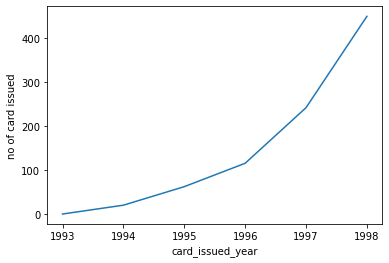

In [70]:
# lets check how many card issued every year
cc = master_table.groupby('card_issued_year')['client_id'].agg('count')
cc.plot.line()
plt.ylabel('no of card issued')
plt.show()

#accouding to the visual issuence of card is increasing every year

In [71]:
master_table['status'].replace(['NaN'], ['NA'], inplace=True)
master_table['card_type'].replace([0],['NA'], inplace=True )

print(master_table.status)

0                                    NaN
1       contract finish without problems
2       contract finish without problems
3                                    NaN
4                                    NaN
                      ...               
5364          running contract OK so far
5365          running contract OK so far
5366    contract finish without problems
5367    contract finish without problems
5368                                 NaN
Name: status, Length: 5369, dtype: object


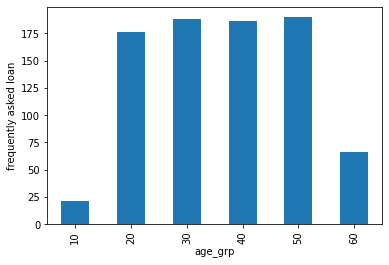

age_grp
10     21
20    176
30    188
40    186
50    190
60     66
Name: status, dtype: int64


In [73]:
# lets see abount who is asking for loan frequently

ln = master_table[master_table['status'].notna()]
ln_1 = ln.groupby('age_grp')['status'].agg('count')
ln_1.plot.bar()
plt.ylabel('frequently asked loan')
plt.show()
print(ln_1)
#print(ln.status)


#### According to the visual, middle age group(arount 50) people ask for loan more frequently or maximum times.

<Figure size 1440x720 with 0 Axes>

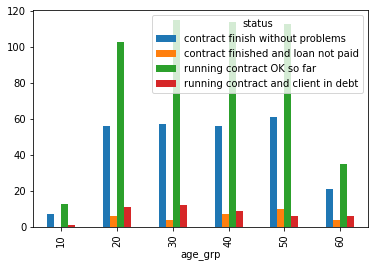

In [80]:
# lets check the loan status of this group of people who asked loan for the most.

v1 = pd.pivot_table(ln, values='client_id', index='age_grp', columns = 'status', aggfunc = 'count', fill_value=0)
plt.figure(figsize = (20,10))
v1.plot.bar()
plt.show()
#print(v1)

#### Now it seems like people who asking for loan frequently are not paying back within contract period or age group between 40 to 50 are not paying back on time compare to juniors and seniors. Not sure if certain age is an impact

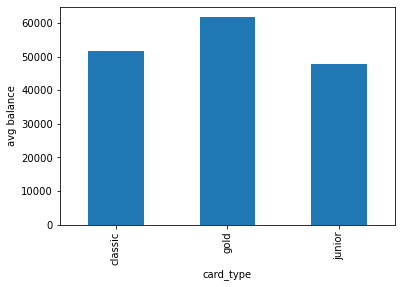

In [83]:
# lets check the average monthly balance of perticular card type
cl = master_table[master_table['card_type'].notna()]
cl1 = cl.groupby('card_type')['avg_monthly_balance'].agg('mean')
cl1.plot.bar()
plt.ylabel('avg balance')
plt.show()


#### Now here, gold card holder has maximum balance comapre to classic and junior holder. whereas, the gold card holder are very few according to the previous visual.

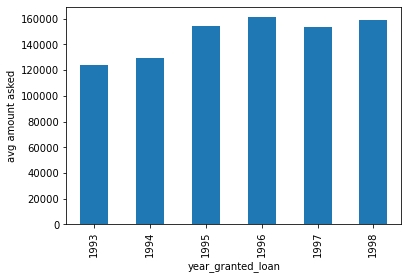

year_granted_loan
1993    124047.272727
1994    129821.568000
1995    154045.527273
1996    161109.863014
1997    153602.820513
1998    158805.410526
Name: amount, dtype: float64


In [91]:
# lets see in which year bank granted maximum amount of loan
pp = master_table[master_table['year_granted_loan'].notna()]
pp1 = pp.groupby('year_granted_loan')['amount'].agg('mean')
pp1.plot.bar()
plt.ylabel('avg amount asked')
plt.show()
print(pp1)

#### It seems like during 1996 bank granted maximum amount of loan